In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the CSV directly from your GitHub repo
url = "https://raw.githubusercontent.com/kalyan924/covid19-india-analysis-forecasting/main/data/case_time_series.csv"
df = pd.read_csv(url)

# 2) Look at the first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
              Date    Date_YMD  Daily Confirmed  Total Confirmed  \
0  30 January 2020  2020-01-30                1                1   
1  31 January 2020  2020-01-31                0                1   
2  1 February 2020  2020-02-01                0                1   
3  2 February 2020  2020-02-02                1                2   
4  3 February 2020  2020-02-03                1                3   

   Daily Recovered  Total Recovered  Daily Deceased  Total Deceased  
0                0                0               0               0  
1                0                0               0               0  
2                0                0               0               0  
3                0                0               0               0  
4                0                0               0               0  


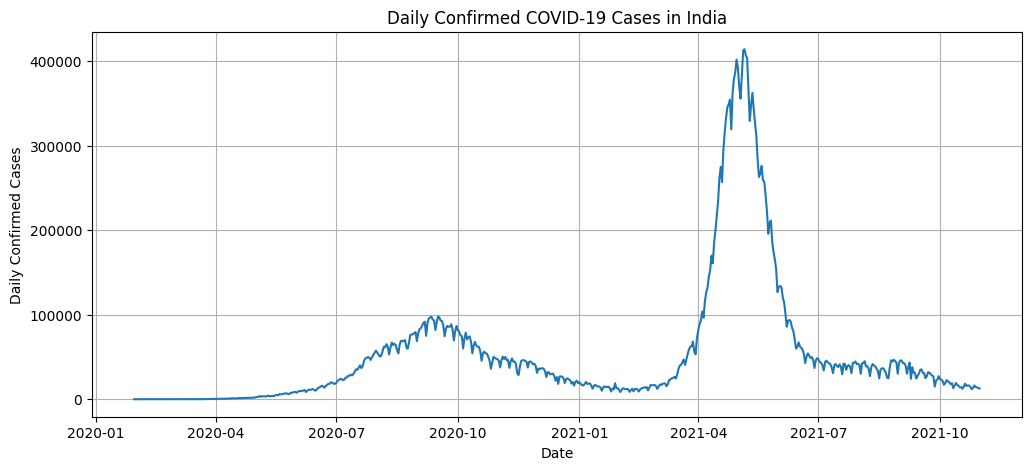

In [2]:
# Make sure Date is a proper date type
df["Date"] = pd.to_datetime(df["Date"])

# Some rows may be empty early on – that's ok
# We'll focus on Daily Confirmed
df["Daily Confirmed"] = pd.to_numeric(df["Daily Confirmed"], errors="coerce").fillna(0)

plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Daily Confirmed"])
plt.title("Daily Confirmed COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("Daily Confirmed Cases")
plt.grid(True)
plt.show()


In [3]:
import pandas as pd

# Load state-wise data from your GitHub
url_state = "https://raw.githubusercontent.com/kalyan924/covid19-india-analysis-forecasting/main/data/state_wise.csv"
df_state = pd.read_csv(url_state)

df_state.head()


,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,34285612,33661339,458470,152606,13/08/2021 23:27:22,13197,TT,0,0,0,NaN
1,Andaman and Nicobar Islands,7651,7518,129,4,13/08/2021 23:27:22,0,AN,0,0,0,NaN
2,Andhra Pradesh,2066450,2047722,14373,4355,13/08/2021 23:27:22,0,AP,0,0,0,NaN
3,Arunachal Pradesh,55155,54774,280,101,13/08/2021 23:27:22,0,AR,0,0,0,[July 25]: All numbers corresponding to Papum ...
4,Assam,610645,600974,5997,2327,13/08/2021 23:27:22,1347,AS,0,0,0,[Jan 1]: 1347 cases i.e Covid +'tive patients ...


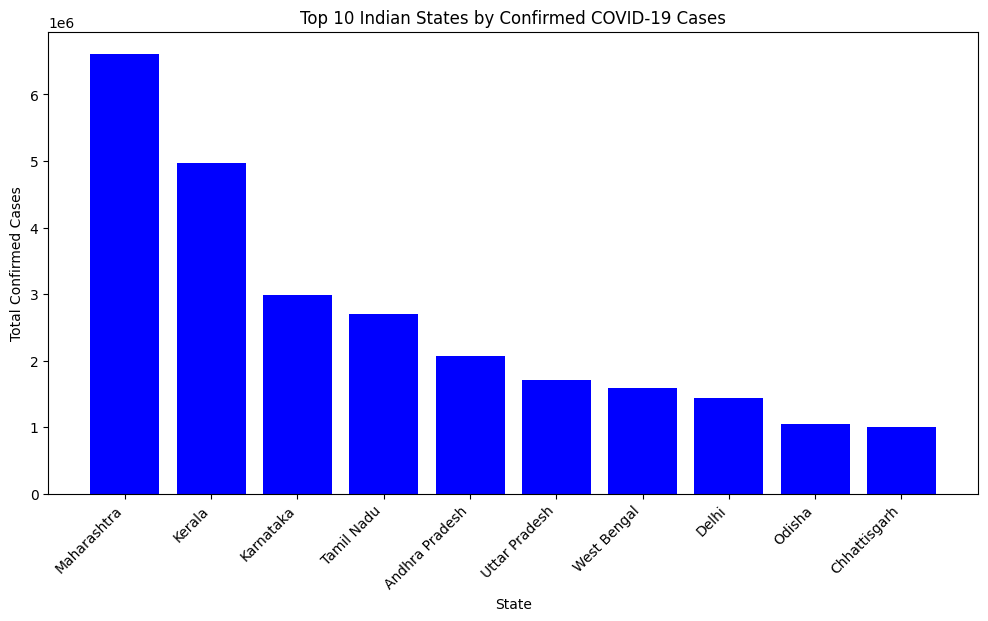

In [4]:
import matplotlib.pyplot as plt

# Remove "Total" row (first row)
df_states = df_state[df_state["State"] != "Total"]

# Select top 10 states by total confirmed cases
top10 = df_states.sort_values("Confirmed", ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top10["State"], top10["Confirmed"], color='blue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Indian States by Confirmed COVID-19 Cases")
plt.xlabel("State")
plt.ylabel("Total Confirmed Cases")
plt.show()


/tmp/ipython-input-3274537121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states["Recovery Rate"] = (df_states["Recovered"] / df_states["Confirmed"]) * 100
/tmp/ipython-input-3274537121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states["Fatality Rate"] = (df_states["Deaths"] / df_states["Confirmed"]) * 100


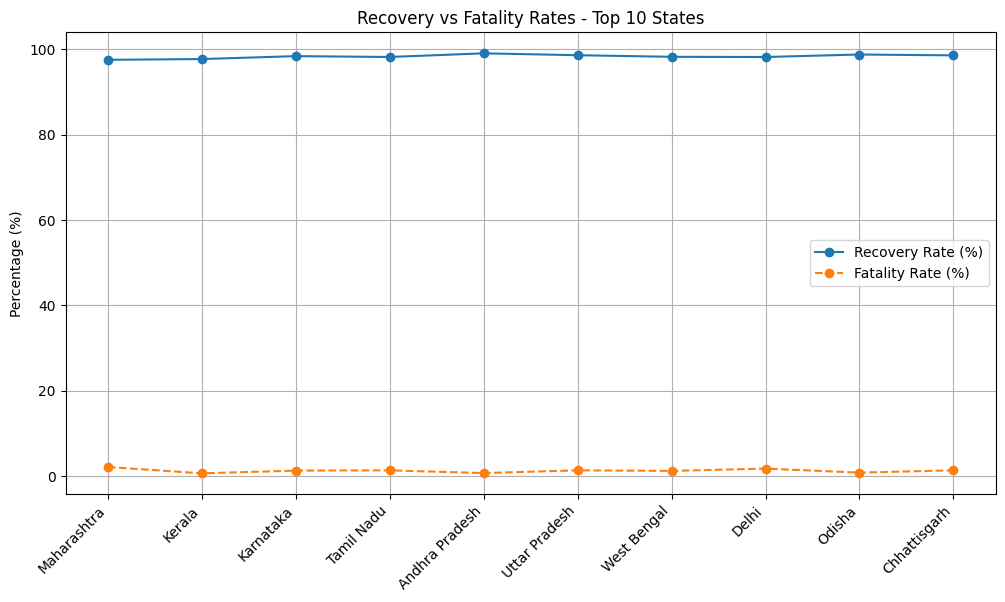

In [5]:
# Calculating rates
df_states["Recovery Rate"] = (df_states["Recovered"] / df_states["Confirmed"]) * 100
df_states["Fatality Rate"] = (df_states["Deaths"] / df_states["Confirmed"]) * 100

rates_top10 = df_states.sort_values("Confirmed", ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.plot(rates_top10["State"], rates_top10["Recovery Rate"], marker='o', label="Recovery Rate (%)")
plt.plot(rates_top10["State"], rates_top10["Fatality Rate"], marker='o', label="Fatality Rate (%)", linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.title("Recovery vs Fatality Rates - Top 10 States")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.show()


🔹 Maharashtra has the highest confirmed COVID-19 cases in India.
🔹 Kerala shows strong recovery outcomes compared to other major states.
🔹 Delhi and Karnataka show higher fatality rates indicating higher severity and strain on healthcare.


In [7]:
# Load testing dataset from GitHub
url_testing = "https://raw.githubusercontent.com/kalyan924/covid19-india-analysis-forecasting/main/data/ICMR_Testing_Data.csv"
df_test = pd.read_csv(url_testing)

df_test.head(), df_test.columns


(   Unnamed: 0         day  totalSamplesTested  totalPositiveCases  \
 0           1  13/03/2020              6500.0                81.0   
 1           2  18/03/2020             13125.0               151.0   
 2           3  19/03/2020             14175.0               173.0   
 3           4  20/03/2020             15404.0               223.0   
 4           5  21/03/2020             16911.0               283.0   
 
                                     Source  positive_ratio  perday_positive  \
 0       Press_Release_ICMR_13March2020.pdf            0.11              7.0   
 1  ICMR_website_update_18March_6PM_IST.pdf            1.06             70.0   
 2  ICMR_website_update_19March_6PM_IST.pdf            2.10             22.0   
 3  ICMR_website_update_20March_6PM_IST.pdf            4.07             50.0   
 4  ICMR_website_update_21March_6PM_IST.pdf            3.98             60.0   
 
    perday_tests  
 0        6500.0  
 1        6625.0  
 2        1050.0  
 3        1229.0  
 

In [11]:
df_test["Date"] = pd.to_datetime(df_test["day"], dayfirst=True, errors="coerce")
df_test = df_test.dropna(subset=["Date"])
df_test = df_test.sort_values("Date")


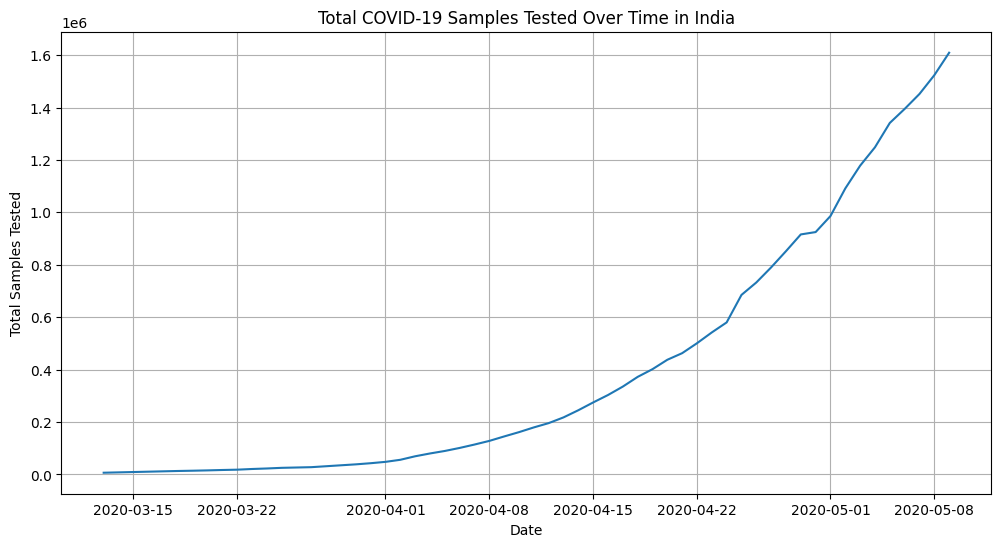

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df_test["Date"], df_test["totalSamplesTested"])
plt.title("Total COVID-19 Samples Tested Over Time in India")
plt.xlabel("Date")
plt.ylabel("Total Samples Tested")
plt.grid(True)
plt.show()


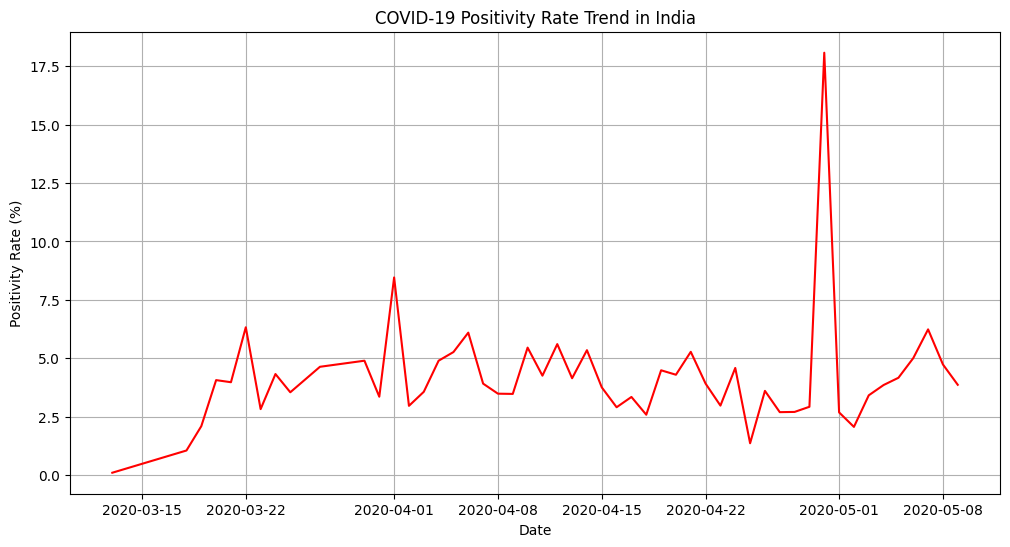

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df_test["Date"], df_test["positive_ratio"], color="red")
plt.title("COVID-19 Positivity Rate Trend in India")
plt.xlabel("Date")
plt.ylabel("Positivity Rate (%)")
plt.grid(True)
plt.show()


In [15]:
import pandas as pd

beds_url = "https://raw.githubusercontent.com/kalyan924/covid19-india-analysis-forecasting/main/data/HospitalBedsIndia.csv"
beds_df = pd.read_csv(beds_url)

beds_df.head(), beds_df.columns


(   Sno                   State/UT NumPrimaryHealthCenters_HMIS  \
 0  1.0  Andaman & Nicobar Islands                           27   
 1  2.0             Andhra Pradesh                         1417   
 2  3.0          Arunachal Pradesh                          122   
 3  4.0                      Assam                         1007   
 4  5.0                      Bihar                         2007   
 
   NumCommunityHealthCenters_HMIS NumSubDistrictHospitals_HMIS  \
 0                              4                          NaN   
 1                            198                           31   
 2                             62                          NaN   
 3                            166                           14   
 4                             63                           33   
 
   NumDistrictHospitals_HMIS TotalPublicHealthFacilities_HMIS  \
 0                         3                               34   
 1                        20                             1666   
 2 

In [17]:
beds_df.rename(columns={"State/UT": "State"}, inplace=True)

health_df = pd.merge(df_states, beds_df, on="State", how="inner")
health_df[["State", "Confirmed", "NumPublicBeds_HMIS"]].head()


,State,Confirmed,NumPublicBeds_HMIS
0,Andhra Pradesh,2066450,60799
1,Arunachal Pradesh,55155,2320
2,Assam,610645,19115
3,Bihar,726098,17796
4,Chandigarh,65351,3756


In [20]:
# Make sure both columns are numeric
health_df["Confirmed"] = pd.to_numeric(health_df["Confirmed"], errors="coerce")
health_df["NumPublicBeds_HMIS"] = pd.to_numeric(health_df["NumPublicBeds_HMIS"], errors="coerce")


In [21]:
health_df["CasesPerBed"] = health_df["Confirmed"] / health_df["NumPublicBeds_HMIS"]
health_df = health_df.dropna(subset=["CasesPerBed"])


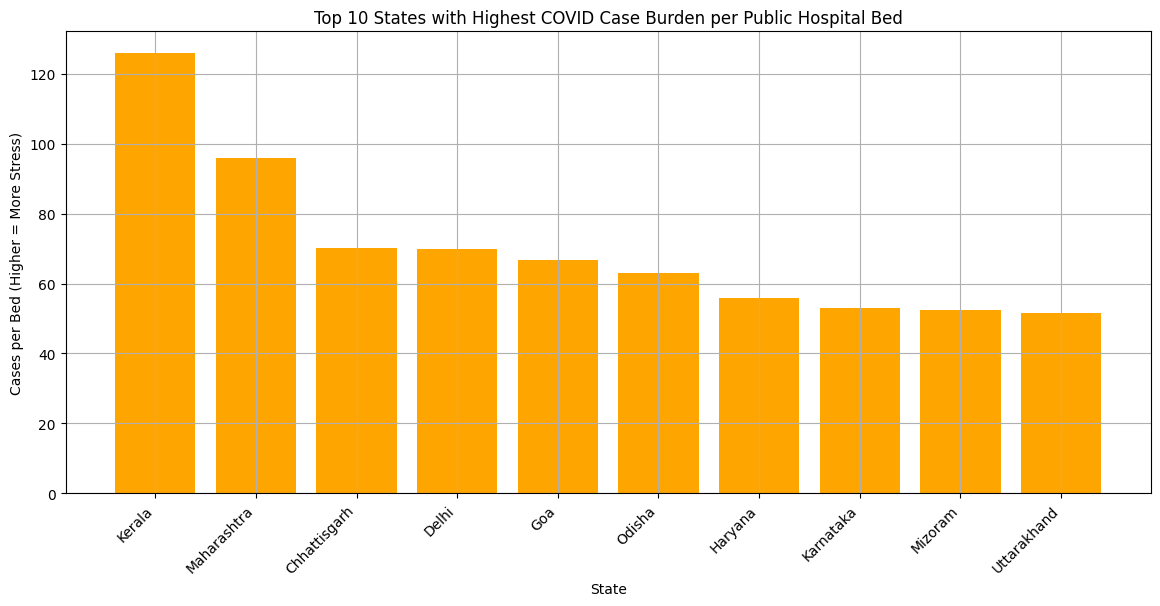

In [22]:
import matplotlib.pyplot as plt

stress_top10 = health_df.sort_values("CasesPerBed", ascending=False).head(10)

plt.figure(figsize=(14,6))
plt.bar(stress_top10["State"], stress_top10["CasesPerBed"], color="orange")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 States with Highest COVID Case Burden per Public Hospital Bed")
plt.ylabel("Cases per Bed (Higher = More Stress)")
plt.xlabel("State")
plt.grid(True)
plt.show()


🔹 Some states show very high COVID case burden per available public hospital bed, indicating severe strain on healthcare resources.
🔹 Urban-heavy states with high cases and limited beds appear particularly vulnerable.
🔹 States with lower cases-per-bed show relatively better healthcare capacity.


In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Copy the daily confirmed data
ts = df[["Date", "Daily Confirmed"]].copy()
ts = ts.set_index("Date")
ts = ts.asfreq("D")
ts["Daily Confirmed"] = ts["Daily Confirmed"].fillna(0)

ts.tail()


,Daily Confirmed
Date,
2021-10-27,16351
2021-10-28,14307
2021-10-29,14215
2021-10-30,12940
2021-10-31,12907


In [24]:
model = SARIMAX(ts["Daily Confirmed"], order=(2, 1, 2))
model_fit = model.fit(disp=False)

# Forecast next 30 days
forecast = model_fit.forecast(30)
forecast


,predicted_mean
2021-11-01,12870.747470
2021-11-02,12603.117835
2021-11-03,12526.540060
2021-11-04,12313.649570
2021-11-05,12217.293779
2021-11-06,12041.369592
2021-11-07,11937.191217
2021-11-08,11787.257960
2021-11-09,11682.095585
2021-11-10,11551.274558


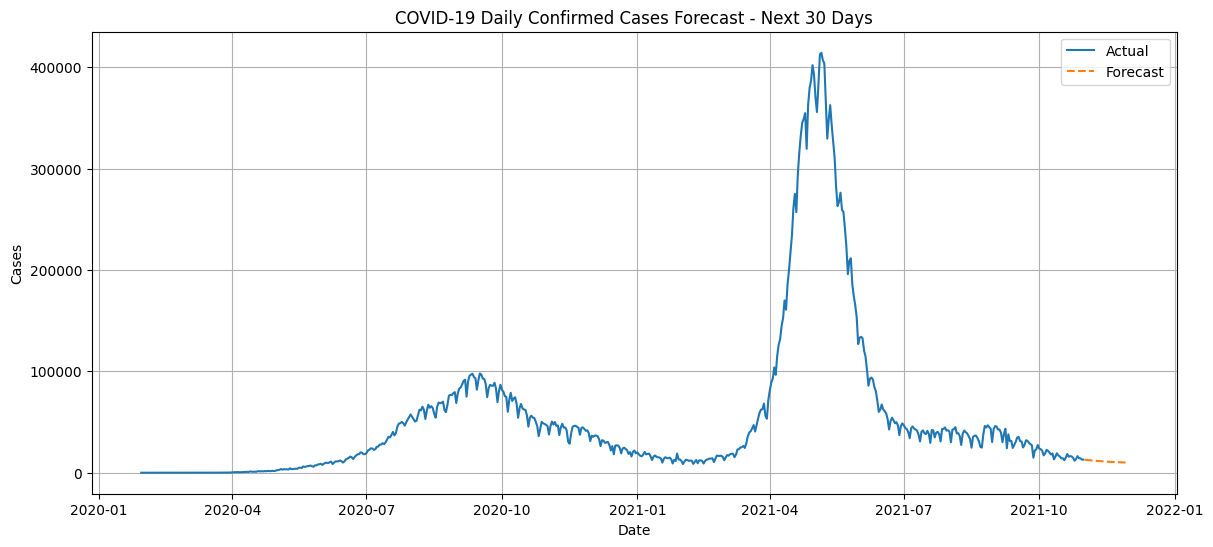

In [25]:
plt.figure(figsize=(14,6))
plt.plot(ts.index, ts["Daily Confirmed"], label="Actual")
plt.plot(forecast.index, forecast, label="Forecast", linestyle='--')

plt.title("COVID-19 Daily Confirmed Cases Forecast - Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.show()


🔹 Forecast indicates continued variability in daily case counts.
🔹 Predictive models help support future resource planning.
🔹 Confidence intervals reflect uncertainty common in pandemic forecasting.
